<a href="https://colab.research.google.com/github/wooheejin01/01/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 준비

판다스 데이터프레임 형태로 저장하고 이중에서 5줄을 출력해보자

IRIS 데이터 세트(다중분류)

In [11]:
import pandas as pd

iris = pd.read_csv('https://raw.githubusercontent.com/jmnote/zdata/master/R/iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 클래스 추출

데이터에 어떤 클래스가 있는지 확인해보자

In [12]:
print(pd.unique(iris['Species']))

['setosa' 'versicolor' 'virginica']


# 입력 데이터와 정답 데이터를 생성해보자

입력 데이터는 iris_input으로 정답 데이터는 iris_target으로 설정


5번째까지의 데이터를 각각 출력

In [13]:
iris_input = iris[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']].to_numpy()

In [14]:
print(iris_input[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [31]:
iris_target = iris['Species'].to_numpy()

# 훈련 세트와 데이터 세트로 나누자

train_input, test_input,train_target,test_target

train_input과 train_target의 형태를 추출하자

In [32]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
iris_input, iris_target, random_state=42)

# 데이터 표준화

훈련 세트와 테스트 세트를 표준화 하자

In [33]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# k-최근접 이웃 알로리즘을 이용하여 훈련하고 훈련 세트와 테스트 세트에 대해 평가하자

In [34]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.9464285714285714
1.0


In [35]:
print(kn.classes_)

['setosa' 'versicolor' 'virginica']


# 테스트 세트의 5개의 데이터에 대해서 예측과 확률을 알아보자

In [36]:
print(kn.predict(test_scaled[:5]))

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor']


# 최적화 해보자

In [37]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [38]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['versicolor' 'versicolor' 'versicolor']]


# 로지스틱 회귀를 이용하여 다중 분류 훈련 및 최적화하기

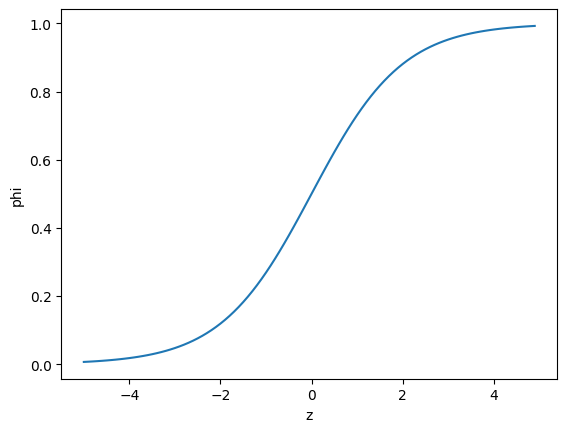

In [25]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

# 확률적 경사 하강법을 이용하여 다중 분 훈련 및 최적화하기

In [39]:
from sklearn.linear_model import SGDClassifier

In [40]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9464285714285714
1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [42]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8571428571428571
0.9210526315789473


In [43]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [44]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

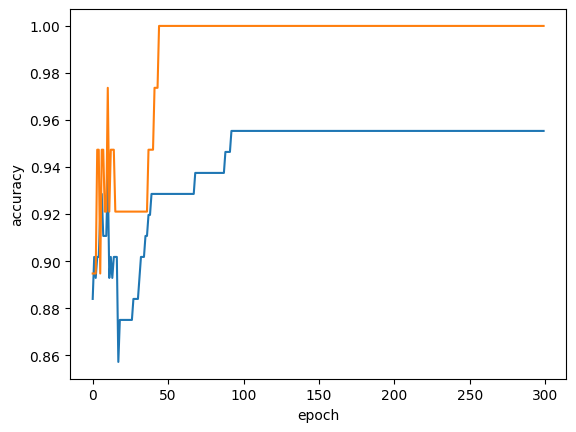

In [45]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [46]:
c = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9464285714285714
1.0


In [47]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9553571428571429
1.0
